# Installing Tensorflow

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tf_keras

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Processing

### Training Image Processing

In [14]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Processing

In [18]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [20]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [22]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[105.5  109.5  110.5 ]
   [108.   112.   113.  ]
   [110.5  114.5  115.5 ]
   ...
   [127.   131.   132.  ]
   [126.5  130.5  131.5 ]
   [127.5  131.5  132.5 ]]

  [[108.25 112.25 113.25]
   [105.75 109.75 110.75]
   [108.25 112.25 113.25]
   ...
   [130.   134.   135.  ]
   [129.5  133.5  134.5 ]
   [130.25 134.25 135.25]]

  [[ 96.25 100.25 101.25]
   [ 97.75 101.75 102.75]
   [108.   112.   113.  ]
   ...
   [126.75 130.75 131.75]
   [129.   133.   134.  ]
   [131.75 135.75 136.75]]

  ...

  [[104.25 104.25 106.25]
   [104.   104.   106.  ]
   [105.75 105.75 107.75]
   ...
   [126.25 130.25 131.25]
   [124.5  128.5  129.5 ]
   [123.25 127.25 128.25]]

  [[111.25 111.25 113.25]
   [102.75 102.75 104.75]
   [ 99.75  99.75 101.75]
   ...
   [127.75 131.75 132.75]
   [126.25 130.25 131.25]
   [123.   127.   128.  ]]

  [[101.25 101.25 103.25]
   [ 99.75  99.75 101.75]
   [100.25 100.25 102.25]
   ...
   [129.75 133.75 134.75]
   [130.   134.   135.  ]
   [126.75 130.75 13

### Building Model

In [26]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [28]:
model = Sequential()

### Building Convulation Layer

In [32]:
model.add(Conv2D (filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D (filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.add(Conv2D (filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D (filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [36]:
model.add(Conv2D (filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D (filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [38]:
model.add(Conv2D (filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D (filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [40]:
model.add(Conv2D (filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D (filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [42]:
model.add(Dropout(0.25))

In [44]:
model.add(Flatten())

In [46]:
model.add(Dense(units=1500, activation='relu'))

In [48]:
model.add(Dropout(0.4))

In [50]:
### Output Layer
model.add(Dense(units=38, activation='softmax'))

### Compiling Model

In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [60]:
training_history= model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2043s 929ms/step - accuracy: 0.3745 - loss: 2.2316 - val_accuracy: 0.8418 - val_loss: 0.5130
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2222s 1s/step - accuracy: 0.8261 - loss: 0.5508 - val_accuracy: 0.9105 - val_loss: 0.2861
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2191s 997ms/step - accuracy: 0.9021 - loss: 0.3014 - val_accuracy: 0.9326 - val_loss: 0.2106
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2226s 1s/step - accuracy: 0.9337 - loss: 0.2025 - val_accuracy: 0.9393 - val_loss: 0.1982
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2051s 934ms/step - accuracy: 0.9515 - loss: 0.1491 - val_accuracy: 0.9501 - val_loss: 0.1548
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1962s 893ms/step - accuracy: 0.9624 - loss: 0.1163 - val_accuracy: 0.9552 - val_loss: 0.1443
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2007s 913ms/step - accuracy: 0.9689 - loss: 0.0940 - val_accuracy: 0.9594 - val_loss: 0.1326
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1984s 903ms/step - 

### Model Evaluation

In [62]:
### Model Evaluation On Training Set
train_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 510s 232ms/step - accuracy: 0.9927 - loss: 0.0206


In [64]:
print(train_loss, train_acc)

0.018099699169397354 0.993840217590332


### Model on Validation Set

In [68]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 119s 216ms/step - accuracy: 0.9714 - loss: 0.1006


In [70]:
print(val_loss,val_acc)

0.10994646698236465 0.9694969058036804


### Saving Model

In [74]:
model.save("trained_model.keras")

In [76]:
training_history.history

{'accuracy': [0.5786328911781311,
  0.8499466776847839,
  0.9098513126373291,
  0.937591552734375,
  0.9533821940422058,
  0.964648962020874,
  0.9715484976768494,
  0.9756312966346741,
  0.978888988494873,
  0.9812362194061279],
 'loss': [1.4360305070877075,
  0.4743211567401886,
  0.2782518267631531,
  0.1893719881772995,
  0.14220978319644928,
  0.10836998373270035,
  0.08716261386871338,
  0.07533671706914902,
  0.06597689539194107,
  0.05601714551448822],
 'val_accuracy': [0.8417937755584717,
  0.9105395078659058,
  0.9326200485229492,
  0.9392784237861633,
  0.9501479864120483,
  0.9551559090614319,
  0.9593671560287476,
  0.9717732667922974,
  0.968529462814331,
  0.9694969058036804],
 'val_loss': [0.5130167007446289,
  0.2861248254776001,
  0.210591122508049,
  0.19819851219654083,
  0.15476162731647491,
  0.14428211748600006,
  0.1325521618127823,
  0.10005402565002441,
  0.10624133795499802,
  0.10994653403759003]}

In [80]:
#Recording on Json
import json
with open ("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

### Accuracy Visualitation

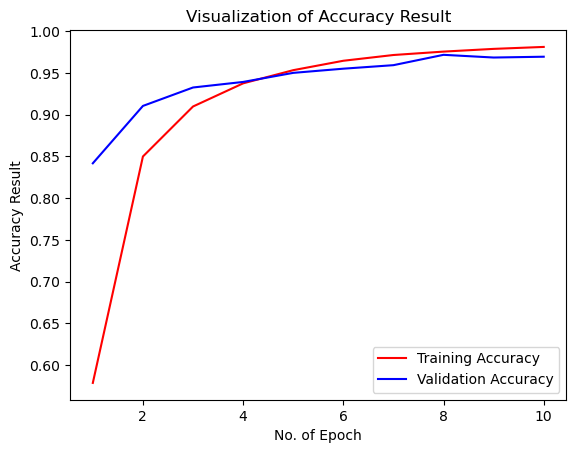

In [88]:
epochs =[i for i in range (1,11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No. of Epoch")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrcics for model accuration

In [90]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [92]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [96]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 114s 207ms/step


(array([[9.99365509e-01, 3.11097317e-08, 8.43134096e-09, ...,
         2.84163090e-16, 8.70150933e-15, 1.32898098e-12],
        [9.99951959e-01, 1.53993710e-07, 6.91037394e-10, ...,
         1.96078987e-18, 8.57365095e-17, 2.25691166e-14],
        [1.00000000e+00, 4.80302331e-09, 2.58015637e-10, ...,
         1.52720884e-17, 1.74378980e-15, 1.08873013e-12],
        ...,
        [9.37275573e-17, 3.90554376e-21, 4.63702664e-14, ...,
         3.17068817e-17, 1.21655711e-17, 1.00000000e+00],
        [1.66000677e-13, 9.97712747e-18, 2.84389136e-12, ...,
         7.85017992e-13, 1.85250629e-14, 1.00000000e+00],
        [6.42542518e-17, 1.25476594e-20, 7.49925583e-17, ...,
         1.64741900e-16, 1.65410830e-14, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [98]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [100]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [104]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

2024-08-06 19:17:04.113368: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [106]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

# 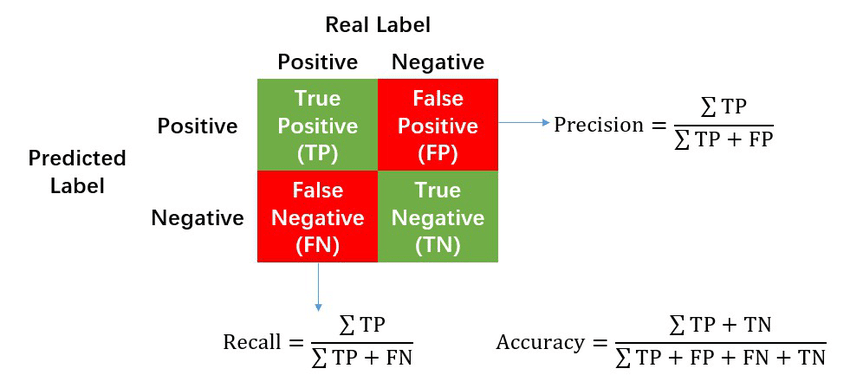

In [132]:
from sklearn.metrics import classification_report, confusion_matrix

In [134]:
print (classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.94      0.96       504
                                 Apple___Black_rot       0.99      0.98      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.97      0.97      0.97       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.89      0.97      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.93      0.

In [136]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[474,   5,   0, ...,   0,   0,   0],
       [  0, 485,   1, ...,   0,   1,   0],
       [  0,   0, 434, ...,   0,   1,   0],
       ...,
       [  0,   0,   0, ..., 489,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   1, ...,   0,   0, 479]])

### Confusion Matrix Visualization

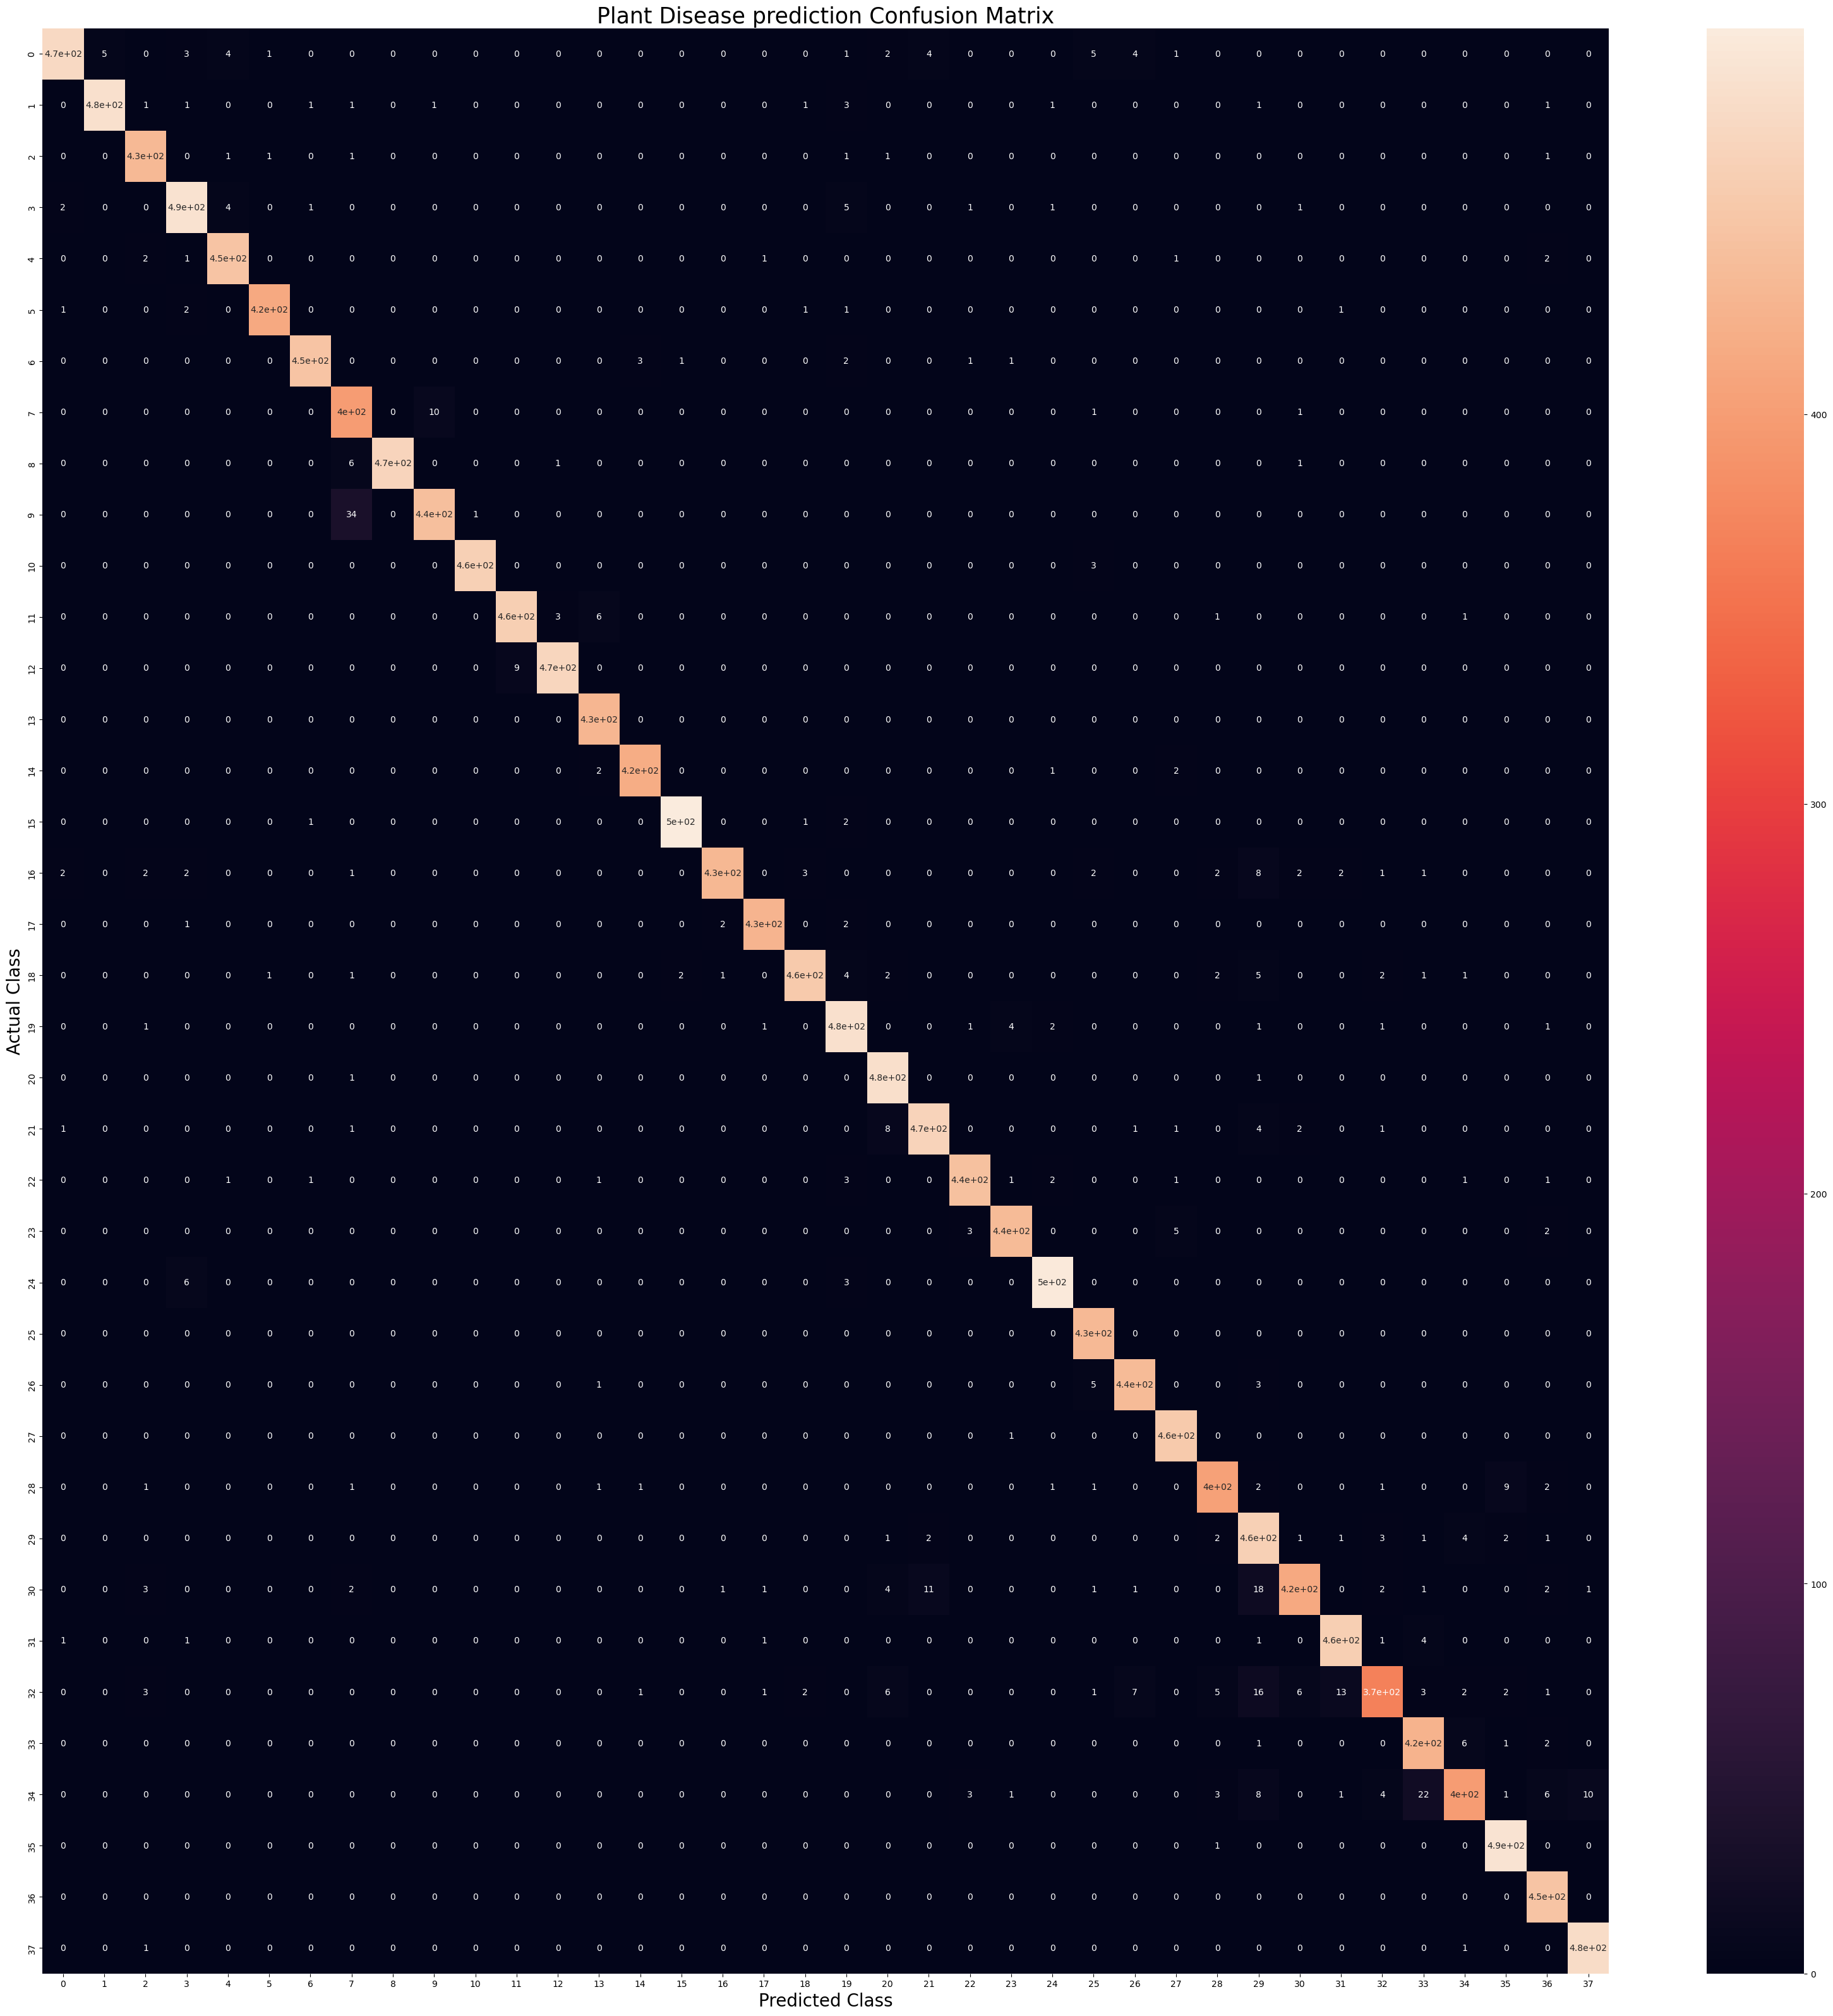

In [155]:
plt.figure(figsize=(40,40))
sns.heatmap(cm, annot=True, annot_kws={'size':10})
plt.xlabel("Predicted Class", fontsize=20)
plt.ylabel("Actual Class", fontsize=20)
plt.title("Plant Disease prediction Confusion Matrix", fontsize=25)
plt.show()